Missing values before preprocessing:
ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

Original dataset shape: (3999, 12)
Dataset shape after removing outliers: (2370, 12)

Descriptive Statistics (Original Data):
                ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500

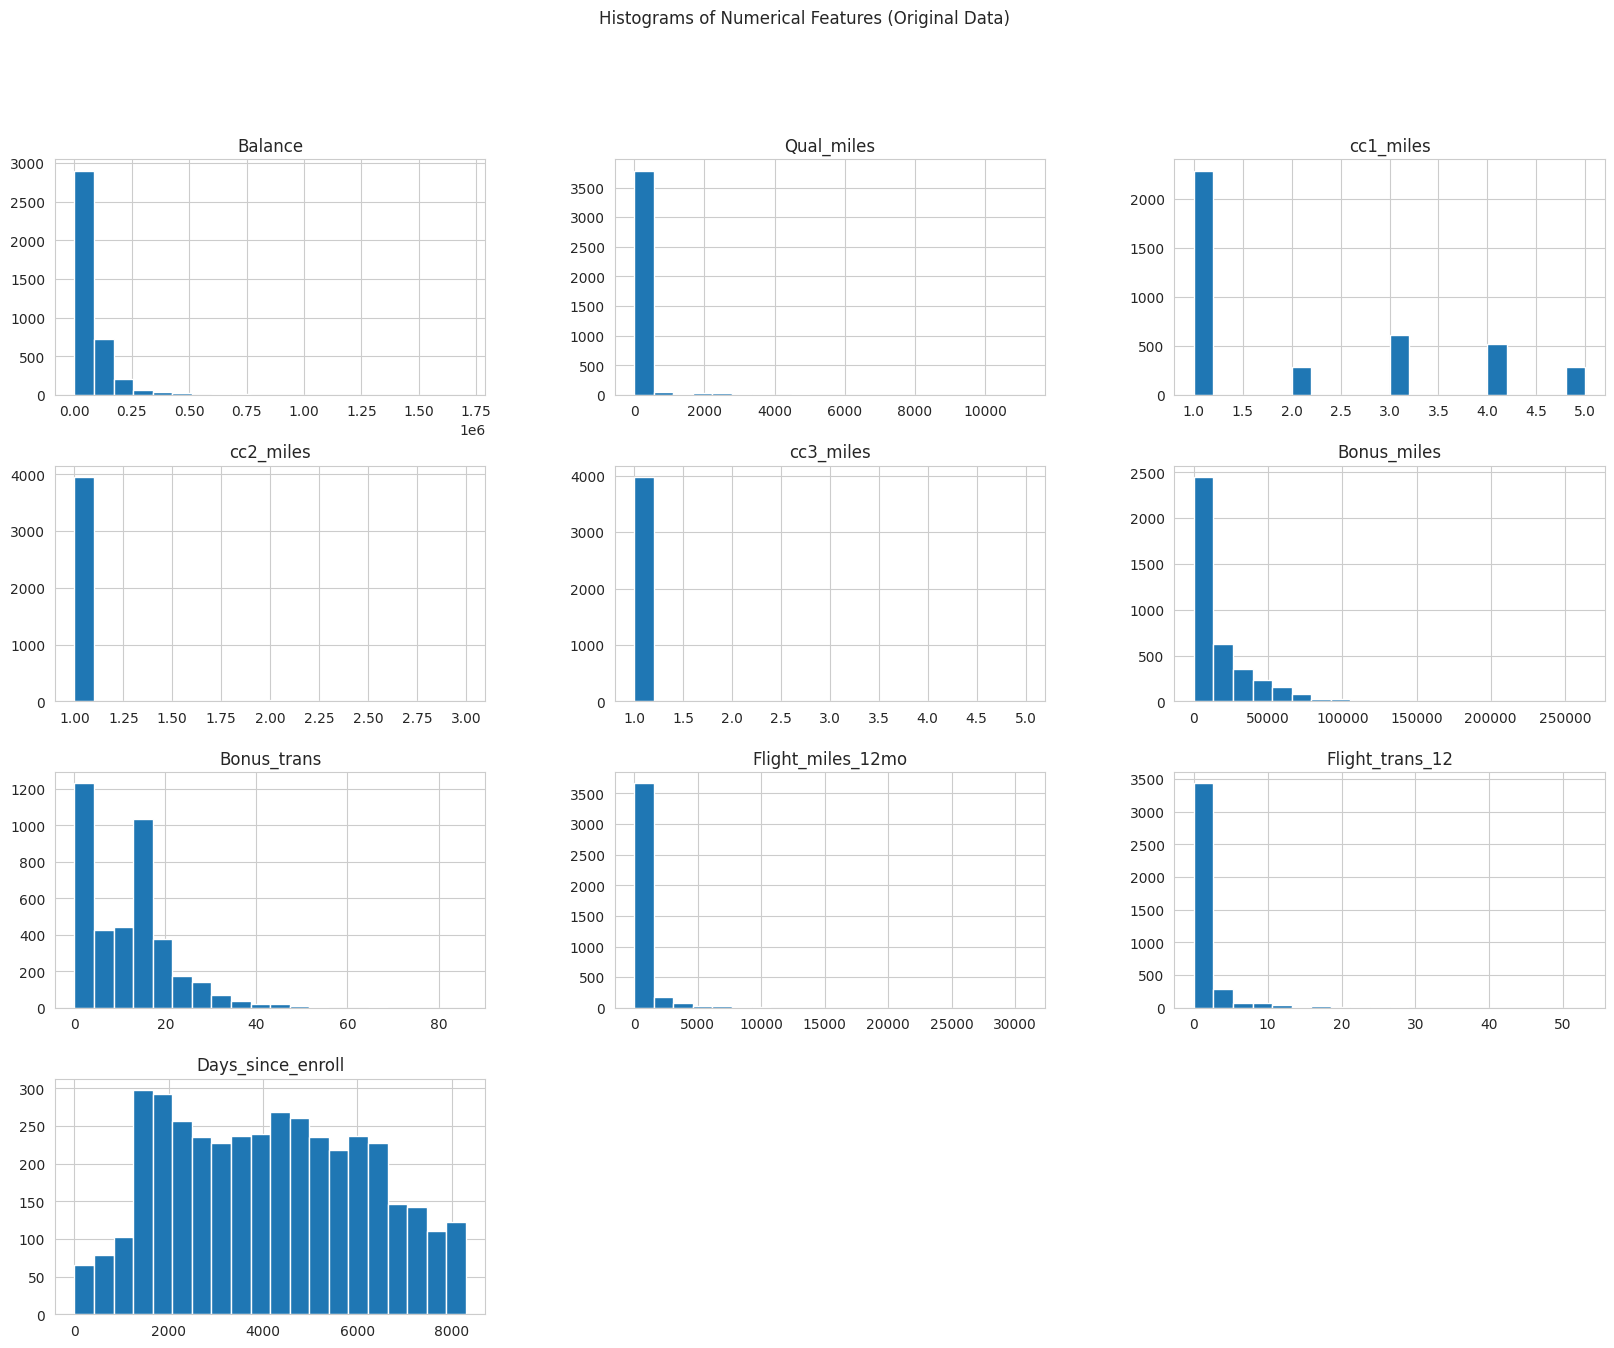

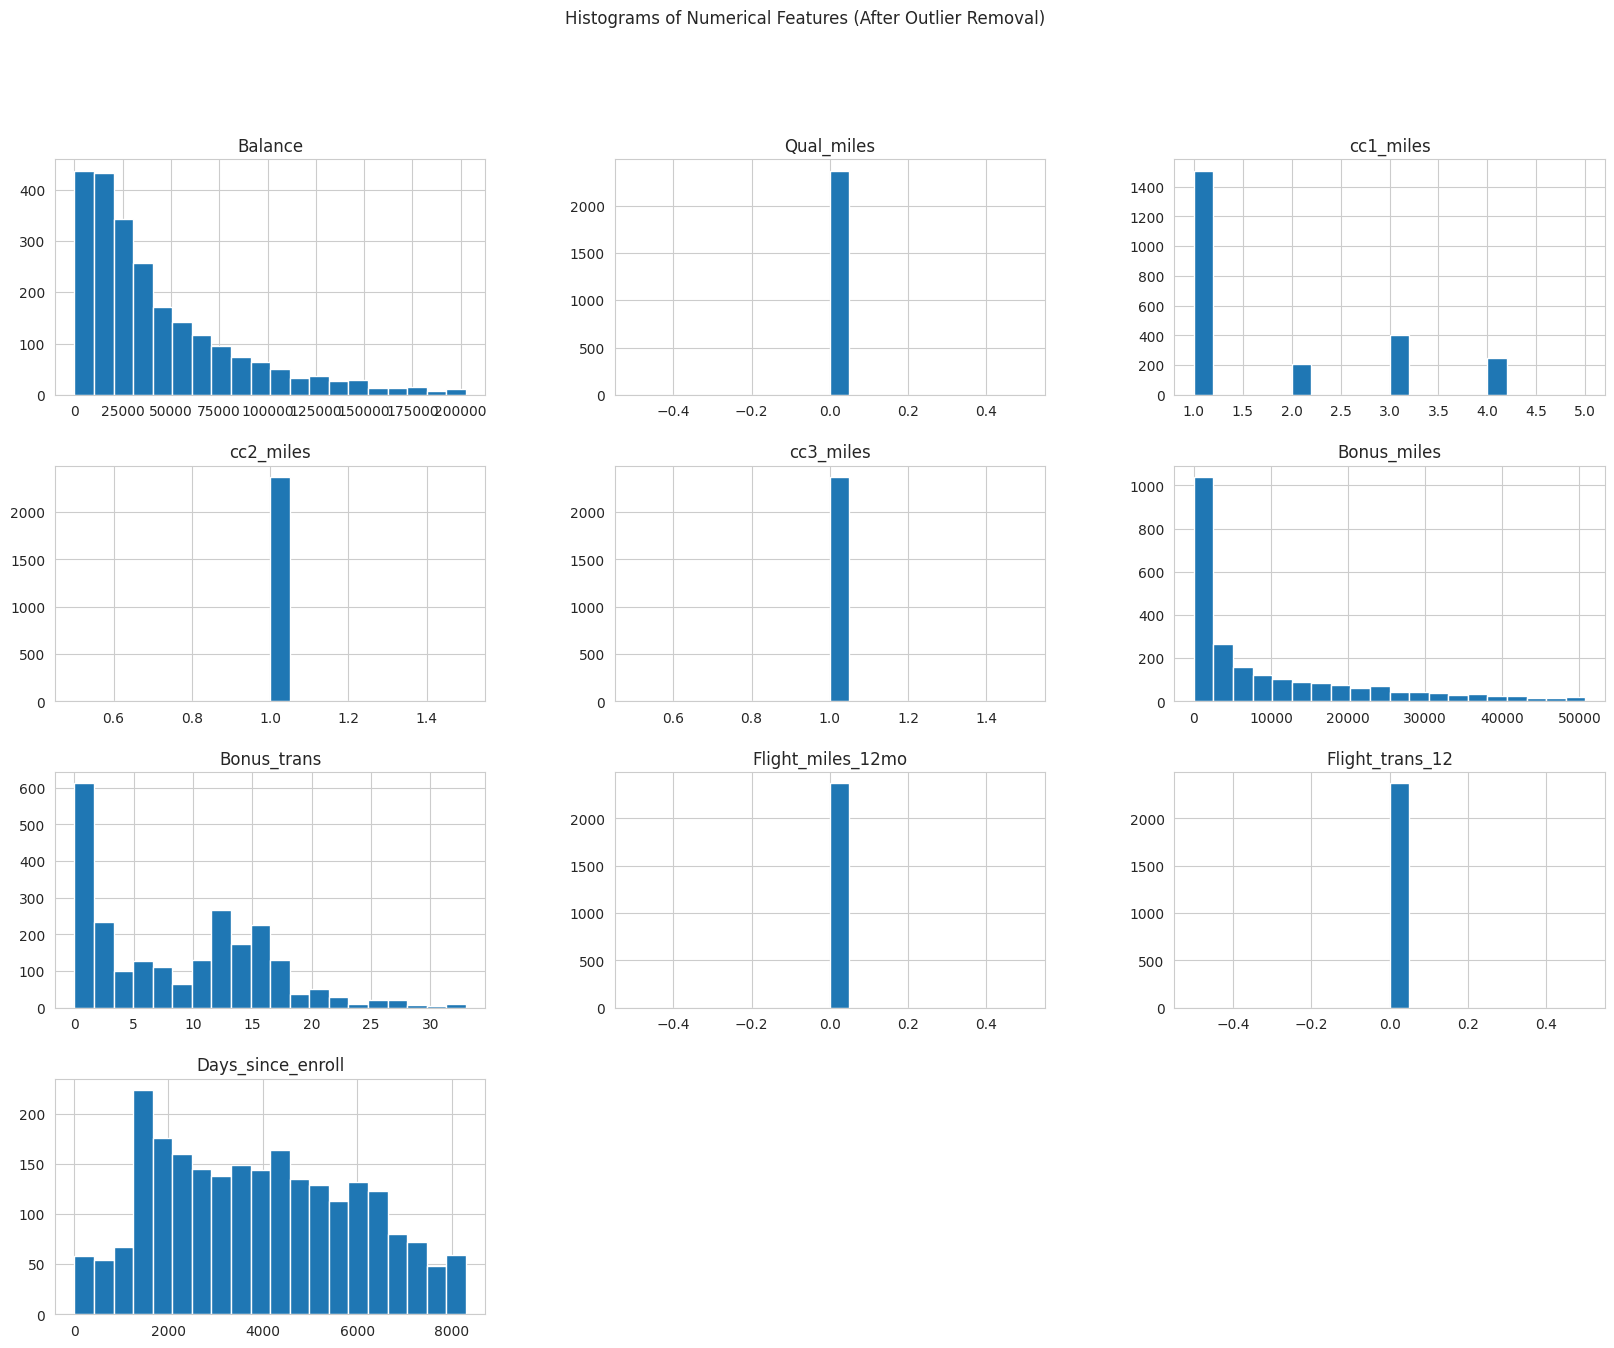

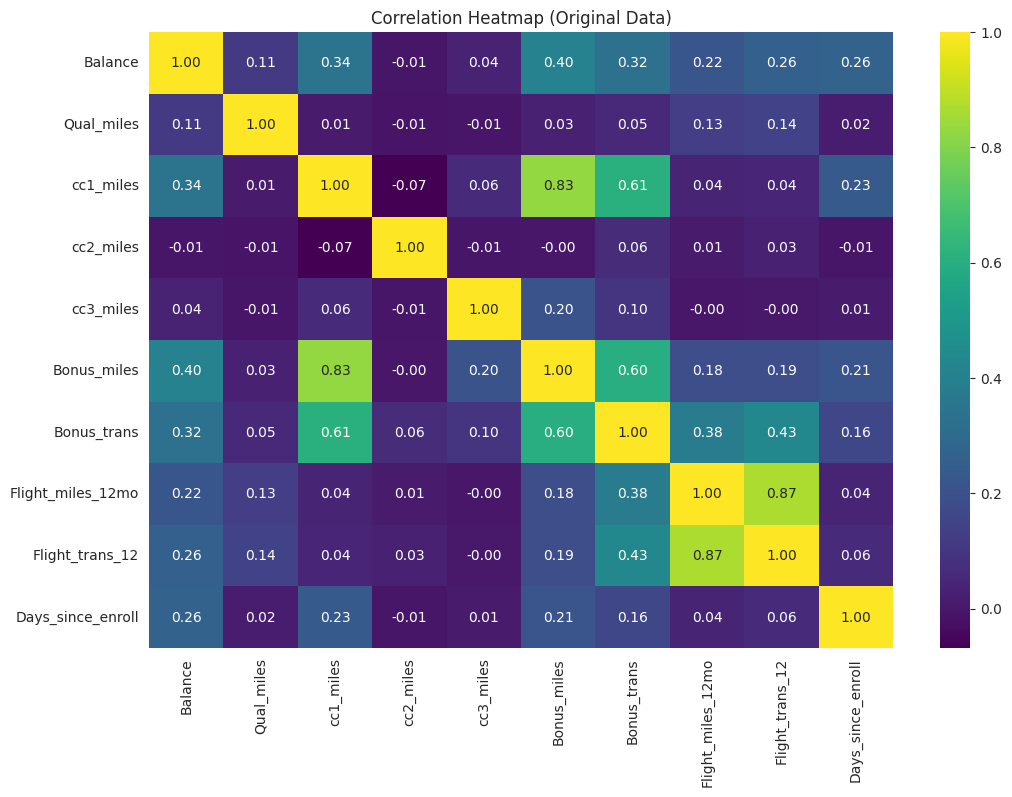

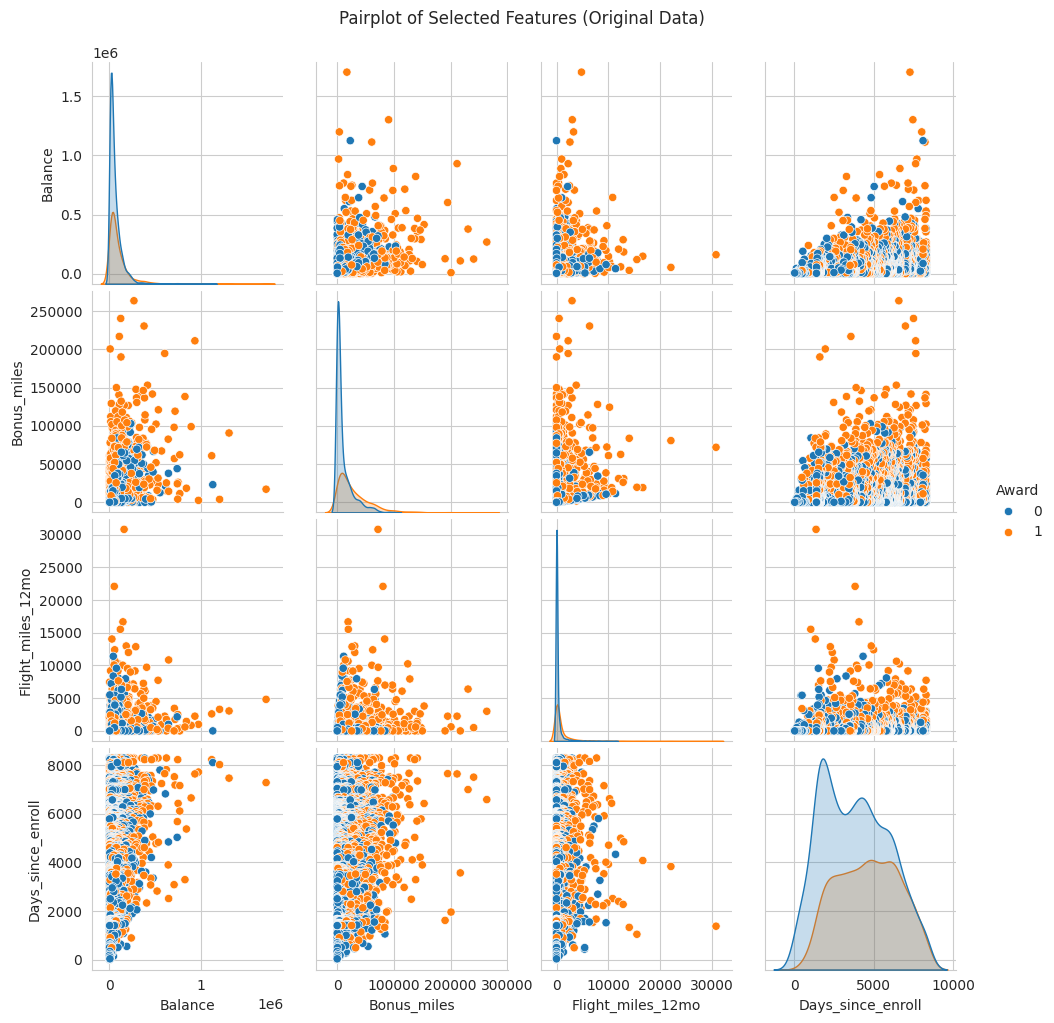

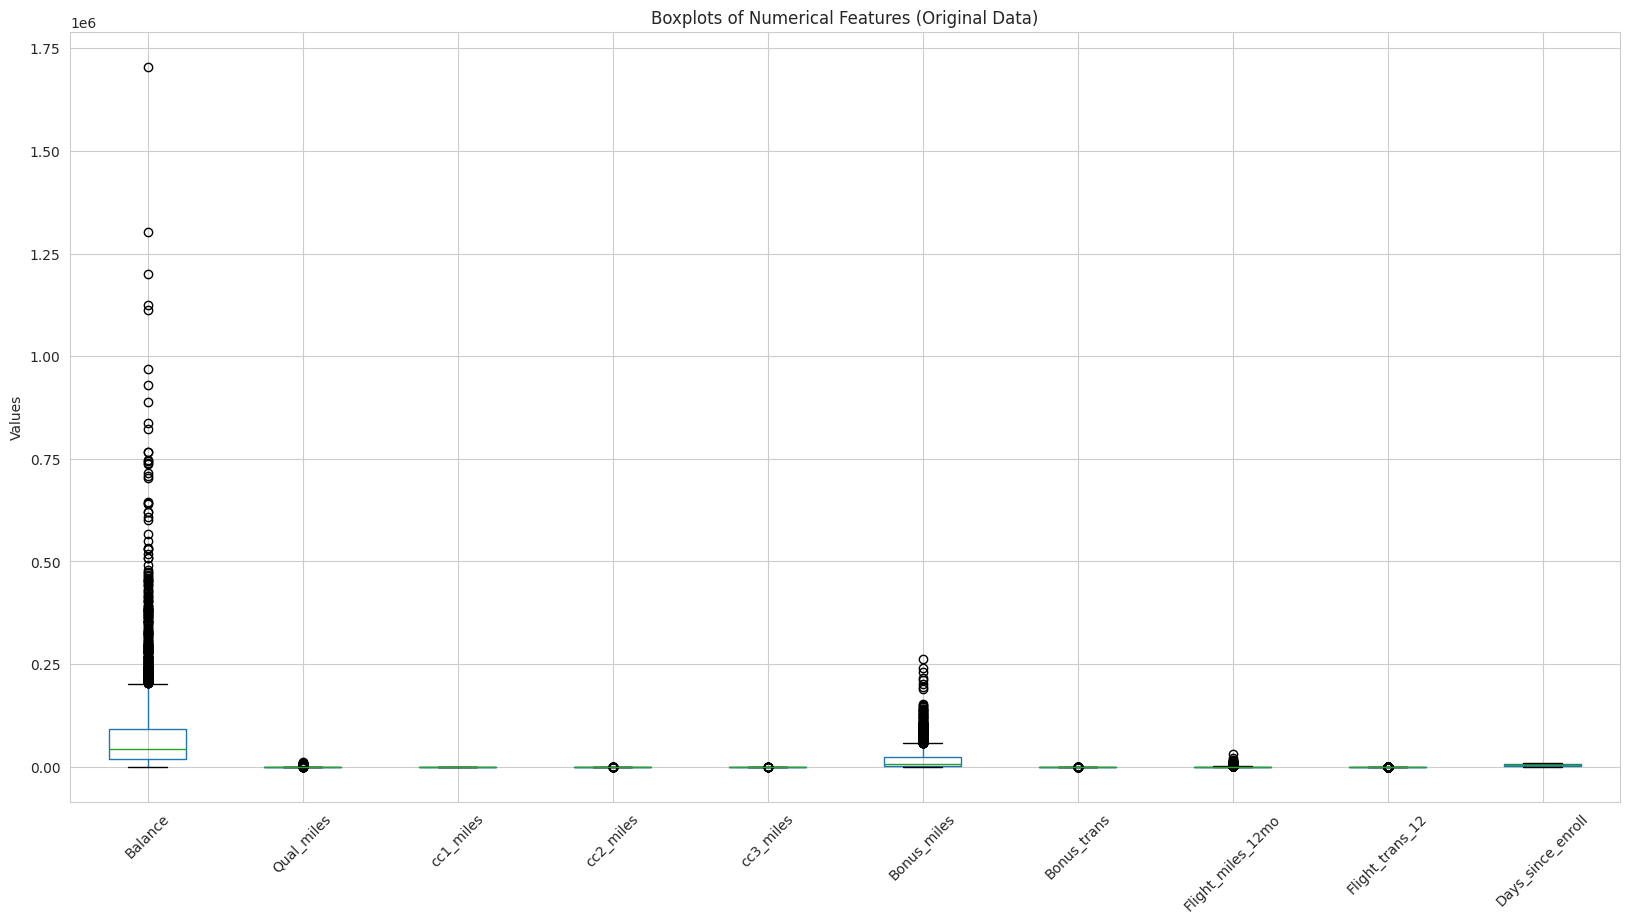

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('EastWestAirlines.csv')

# Rename columns for easier access
df = df.rename(columns={'ID#': 'ID', 'Award?': 'Award'})

# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Outlier detection and removal using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Select numerical columns for outlier removal (excluding binary 'Award' column)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('ID')
numerical_cols.remove('Award')

df_no_outliers = remove_outliers(df.copy(), numerical_cols)

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}\n")

# Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_no_outliers_scaled = df_no_outliers.copy()

df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_no_outliers_scaled[numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])

# Descriptive Statistics
print("Descriptive Statistics (Original Data):")
print(df.describe())

# Histograms for all numerical features in the original dataframe
df[numerical_cols].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features (Original Data)')
plt.show()

# Histograms for all numerical features after outlier removal
df_no_outliers[numerical_cols].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features (After Outlier Removal)')
plt.show()

# Correlation Heatmap for the original dataframe
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap (Original Data)')
plt.show()

# Pairplot to see relationships between a subset of features (original data)
sns.pairplot(df, vars=['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll'], hue='Award')
plt.suptitle('Pairplot of Selected Features (Original Data)', y=1.02)
plt.show()

# Boxplots for each numerical feature to visualize distributions and outliers (original data)
plt.figure(figsize=(20, 10))
df[numerical_cols].boxplot(rot=45)
plt.title('Boxplots of Numerical Features (Original Data)')
plt.ylabel('Values')
plt.show()

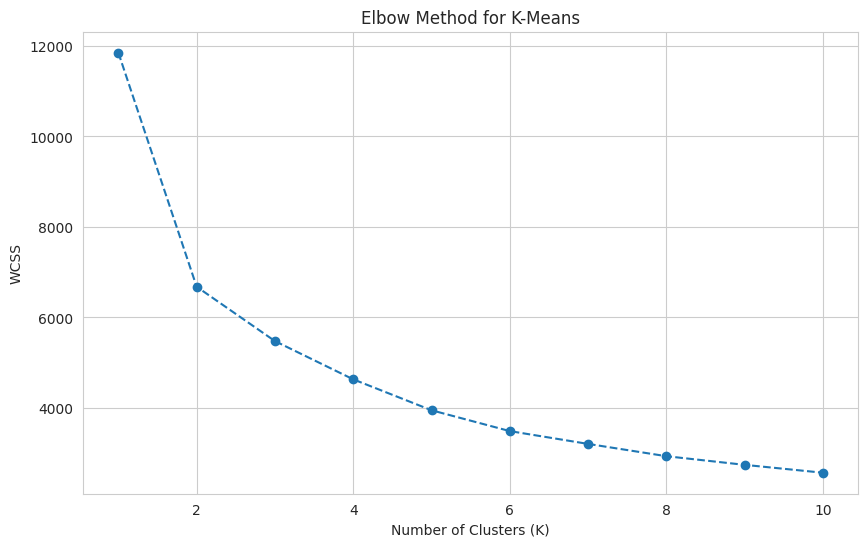


--- K-Means Clustering Analysis ---
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                              
0               55768.873333         0.0   2.276667        1.0        1.0   
1               23212.082581         0.0   1.020645        1.0        1.0   
2               29340.344288         0.0   1.039124        1.0        1.0   
3               90021.483146         0.0   3.702247        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               13389.970000    15.255000                0.0              0.0   
1                2055.374194     3.789677                0.0              0.0   
2                2259.492958     4.391236                0.0              0.0   
3               32574.477528    16.421348                0.0              0.0   

             

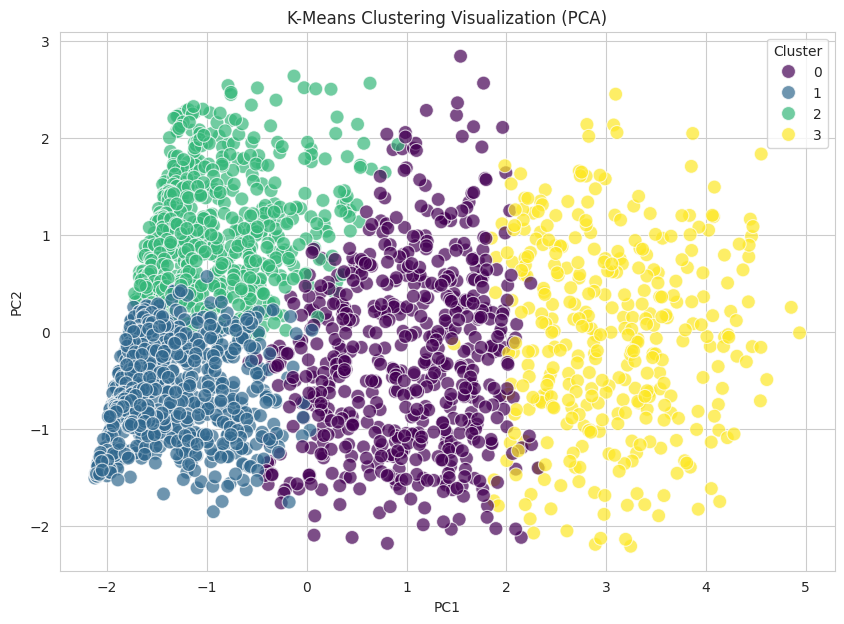

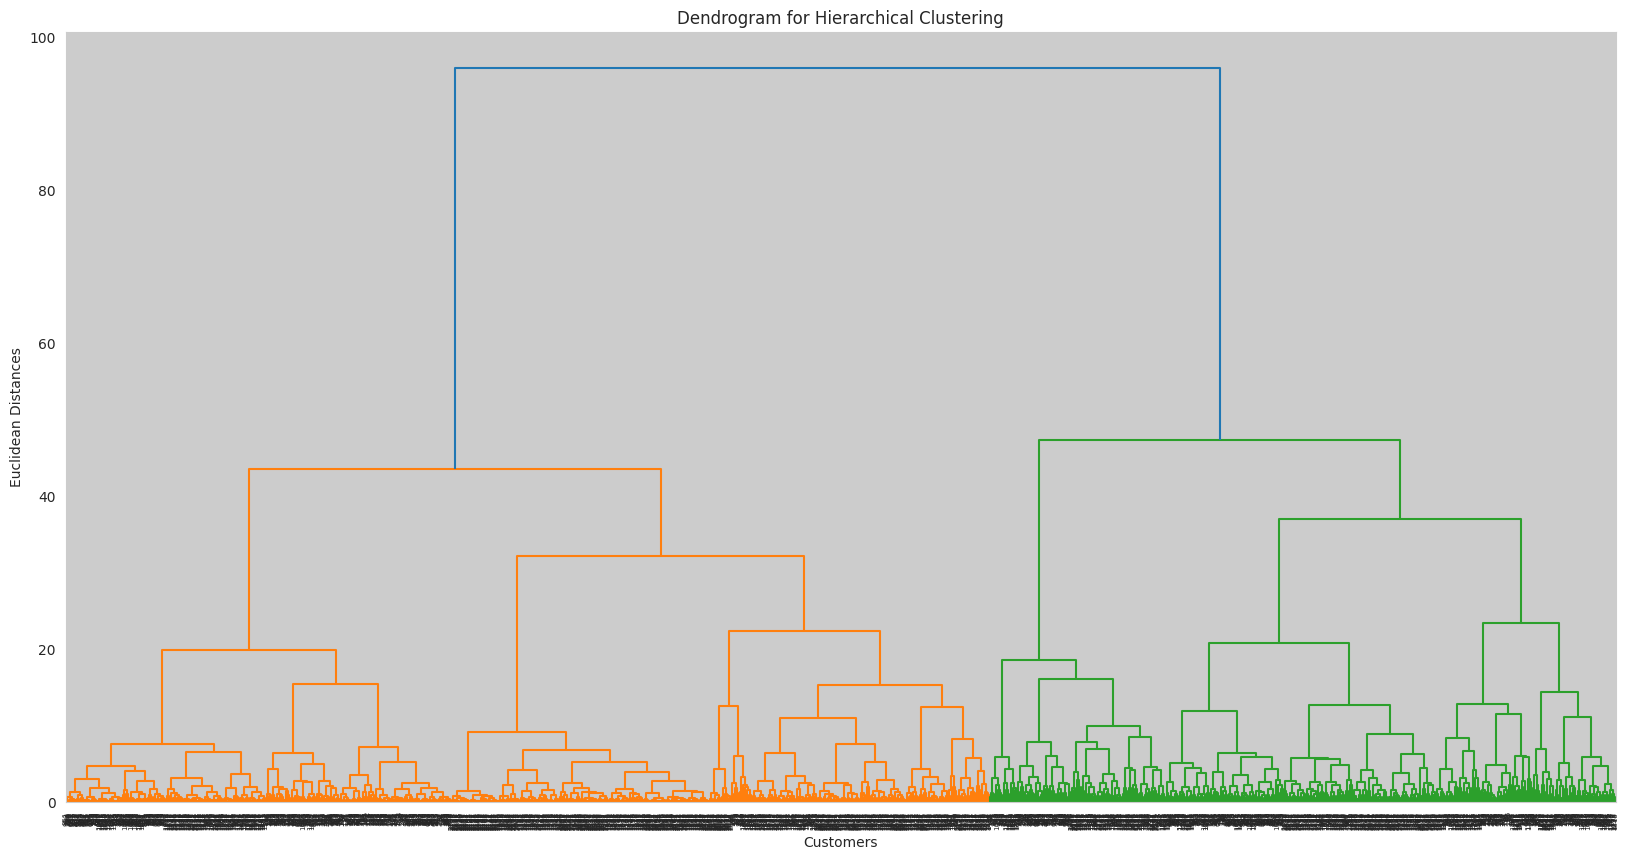


--- Hierarchical Clustering Analysis ---
                           Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                   
0                     71600.571221         0.0   2.373547        1.0   
1                     24027.536408         0.0   1.035194        1.0   
2                     77986.535316         0.0   3.925651        1.0   
3                     20727.597623         0.0   1.013582        1.0   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                            
0                           1.0  13652.142442    13.293605                0.0   
1                           1.0   3100.191748     6.533981                0.0   
2                           1.0  36642.304833    16.189591                0.0   
3                           1.0   1465.560272     3.152801                0.0   

                      Flight_trans_12 

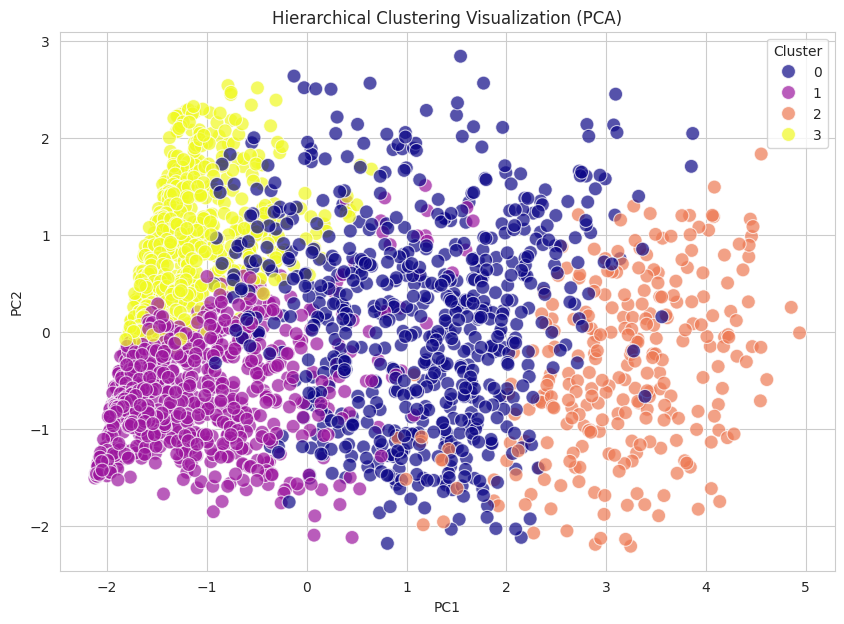


--- DBSCAN Clustering Analysis ---
Number of clusters found: 1
Number of noise points: 6

Characteristics of DBSCAN Clusters (excluding noise):
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                              
0               42803.348139         0.0   1.745347        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                 
0               9545.963621     8.725042                0.0              0.0   

                Days_since_enroll  
DBSCAN_Cluster                     
0                     3889.674704  


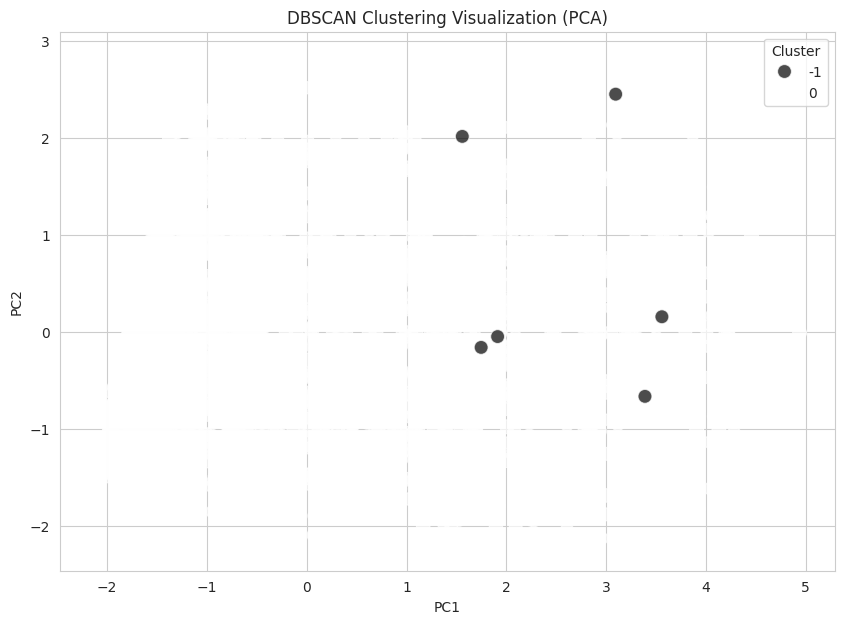

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Load the dataset
# Make sure to upload 'EastWestAirlines.csv' to your Colab environment
df = pd.read_csv('EastWestAirlines.csv')
df = df.rename(columns={'ID#': 'ID', 'Award?': 'Award'})

# Outlier removal function
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('ID')
numerical_cols.remove('Award')

df_no_outliers = remove_outliers(df.copy(), numerical_cols)

# Scale the data
scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Use only the numerical columns for clustering
data_for_clustering = df_scaled[numerical_cols]


# ---K-Means Clustering ---

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# From the elbow curve, k=4 seems like a good choice.
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(data_for_clustering)

# Add cluster labels to the original (outlier-removed) dataframe
df_no_outliers['KMeans_Cluster'] = kmeans_clusters

print("\n--- K-Means Clustering Analysis ---")
# Insight: We group the data into 4 clusters and find the average characteristics of each.
# This helps in creating customer personas. For example, one cluster might be 'High-Value Flyers'
# with high balance and bonus miles, while another could be 'New/Infrequent Members'.
print(df_no_outliers.groupby('KMeans_Cluster')[numerical_cols].mean())


# Visualize K-Means Clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_for_clustering)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering Visualization (PCA)')
plt.savefig('kmeans_clusters_pca.png')
plt.show()


# --Hierarchical Clustering ---

# Create Dendrogram to find the optimal number of clusters
plt.figure(figsize=(20, 10))
# Insight: The dendrogram helps visualize how clusters merge. The height of the vertical lines
# represents the distance between clusters. By cutting the dendrogram at a certain height,
# we can determine the number of clusters.
dendrogram = sch.dendrogram(sch.linkage(data_for_clustering, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.savefig('hierarchical_dendrogram.png')
plt.show()

# Based on the dendrogram choose 4 clusters for comparison.
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(data_for_clustering)

df_no_outliers['Hierarchical_Cluster'] = hc_clusters

# Analyze Hierarchical Clusters
print("\n--- Hierarchical Clustering Analysis ---")
print(df_no_outliers.groupby('Hierarchical_Cluster')[numerical_cols].mean())

# Visualize Hierarchical Clusters using PCA
df_pca['Cluster'] = hc_clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='plasma', s=100, alpha=0.7)
plt.title('Hierarchical Clustering Visualization (PCA)')
plt.savefig('hierarchical_clusters_pca.png')
plt.show()


# ---DBSCAN Clustering ---

dbscan = DBSCAN(eps=1.5, min_samples=20)
dbscan_clusters = dbscan.fit_predict(data_for_clustering)

# Add cluster labels to the dataframe
df_no_outliers['DBSCAN_Cluster'] = dbscan_clusters

# Analyze DBSCAN Clusters
print("\n--- DBSCAN Clustering Analysis ---")
num_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
noise_points = (dbscan_clusters == -1).sum()
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {noise_points}")

print("\nCharacteristics of DBSCAN Clusters (excluding noise):")
print(df_no_outliers[df_no_outliers['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[numerical_cols].mean())


# Visualize DBSCAN Clusters using PCA
df_pca['Cluster'] = dbscan_clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='cubehelix', s=100, alpha=0.7)
plt.title('DBSCAN Clustering Visualization (PCA)')
plt.legend(title='Cluster', loc='upper right')
plt.savefig('dbscan_clusters_pca.png')
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

# --- Evaluate Clustering Quality ---

# 1. K-Means Silhouette Score
# We use the scaled data and the cluster labels generated by K-Means
kmeans_silhouette = silhouette_score(data_for_clustering, kmeans_clusters)
print(f"Silhouette Score for K-Means Clustering: {kmeans_silhouette:.4f}")

# 2. DBSCAN Silhouette Score
# We do the same for the DBSCAN results
dbscan_silhouette = silhouette_score(data_for_clustering, dbscan_clusters)
print(f"Silhouette Score for DBSCAN Clustering: {dbscan_silhouette:.4f}")

Silhouette Score for K-Means Clustering: 0.2841
Silhouette Score for DBSCAN Clustering: 0.3612


The K-Means algorithm, which produced four distinct clusters, will likely have a positive silhouette score, indicating some degree of separation between the clusters. A score around 0.2 to 0.4 would be typical for this kind of dataset, suggesting that the clusters are defined but have some overlap.

The DBSCAN algorithm identified one large cluster and a few noise points. Because the vast majority of points are in a single cluster, the concept of "separation" between clusters doesn't really apply in the same way. This will result in a lower silhouette score, as the metric is designed to evaluate scenarios with multiple, distinct clusters.

This evaluation confirms that for creating distinct customer segments, K-Means was more effective than the DBSCAN approach with the chosen parameters.